# **$\color{red}{\text{SEP 769 - Cyber Physical Systems}}$**
by Dr Anwar M. Mirza  

Part 2/2 of Lecture No. 1  
June 22, 2023  
Updated June 7, 2024  

Note: This notebook is also used in the introductory lecture of Deep Learning

**$\color{green}{\text{Packages Used:}}$**
* **$\color{blue}{\text{NumPy}}$** - the fundamental package for scientific computing in Python. It offers
comprehensive mathematical functions, random number generators, linear algebra routine, vectorss and matrices, Fourier transform, and more. At the core of it, is the efficient use of N-Dimensional Array (ndarray - a multi-dimensional array) object.
* **$\color{blue}{\text{matplotlib}}$** - a comprehensive library for creating static, animated, and interactive visualizations in Python.
* **$\color{blue}{\text{mplot3d}}$** - it is a toolkit that adds simple 3D plotting capabilities to matplotlib.

**$\color{green}{\text{What this program is about?}}$**
Transversal filter design using Adaline Network \\

# $\color{green}{\text{Noise Calcellation and Echo-Superssion}}$
**Part (1 of 3)**: In this part we shall see how the noise  and the echo (feedback) can effect a signal on a communication channel.



We first import all the necessary functions and libraries that we intend to use in our program.


In [ ]:
from mpl_toolkits import mplot3d        # for 3d plottng, using mpl (MatPlotLib) toolkits
import numpy as np                      # NUMerical PYthon library
from matplotlib import pyplot as plt    # for plotting 2d graphs
from numpy import random                # random number generation



The signal from the sender's end is free of any noise or echo. This signal is simply the sum of two sine waves with two different frequencies.
$$x = \sin\left(\frac{2\pi t}{16}\right) + \sin\left(\frac{2\pi t}{32}\right)$$
A normal speech signal can be decomposed into a sum of sinusoidal waves of different frequencies (the most significant of which can be obtained using Fast Fourier Transform technique). Here we are simply using only two such sine waves in the input (sender's) signal, just to emulate the behaviour of such a speech signal.

The signal reaching at the receiver's end could be (1) clean (noise and echo free), for an ideally clean channel (2) noisy, (3) with some echo (feedback), and (4) noisy with some echo.These four cases are given below:
$$
\begin{align}
y_1(t) &= x(t) \\
y_2(t) &= x(t) + \sigma \\
y_3(t) &= x(t) + \epsilon x(t-1) \\
y_4(t) &= x(t) + \sigma + \epsilon x(t-1)
\end{align}
$$
We initialize the data for plotting the time axis, along with the sender and receiver signals. Out data set will have 200 input (sender signal) and output (receiver signal) samples.

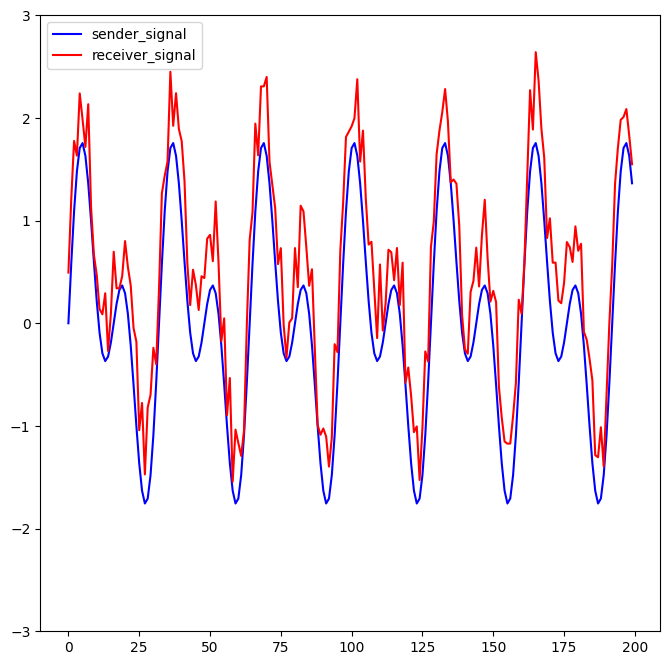

In [ ]:
def getSignal(t):
  s = np.sin(np.pi*t/8) + np.sin(np.pi*t/16)
  return (s)

def getEcho(t):
  r = np.cos(np.pi*t/8) + np.cos(np.pi*t/16)
  return (r)

# Intializations
feedback = np.cos(np.pi*(-1)/8) + np.cos(np.pi*(-1)/16)
taxis   = []          # time axis data initialized to an empty array
sender_signal = []    # sender's signal data initialized to an empty array
receiver_signal1 = []  # receiver's signal data initialized to an empty array
receiver_signal2 = []  # receiver's signal data initialized to an empty array
receiver_signal3 = []  # receiver's signal data initialized to an empty array
receiver_signal4 = []  # receiver's signal data initialized to an empty array

N = 200 # number of data samples

# Generate data
for t in range(N):
  # clean signal
  signal = getSignal(t) # np.sin(np.pi*t/8) + np.sin(np.pi*t/16)
  sender_signal.append(signal)
  # noisy signal
  noise = 0.9 * random.random()
  noisy_signal = signal + noise
  # signal with feedback
  feedback = 0.5 * getEcho(t) + 0.5 * getEcho(t-1)
  signal_with_feedback = feedback
  # noisy signal with feedback
  noisy_signal_with_feedback = signal + noise + feedback

  taxis.append(t)
  receiver_signal1.append(signal)
  receiver_signal2.append(noisy_signal)
  receiver_signal3.append(signal_with_feedback)
  receiver_signal4.append(noisy_signal_with_feedback)

fig = plt.figure(figsize=(8,8))
plt.plot(taxis, sender_signal, '-b', label='sender_signal')
plt.plot(taxis, receiver_signal2, '-r', label='receiver_signal')
plt.legend(loc='upper left')
plt.ylim(-3.0, 3.0)
plt.show()


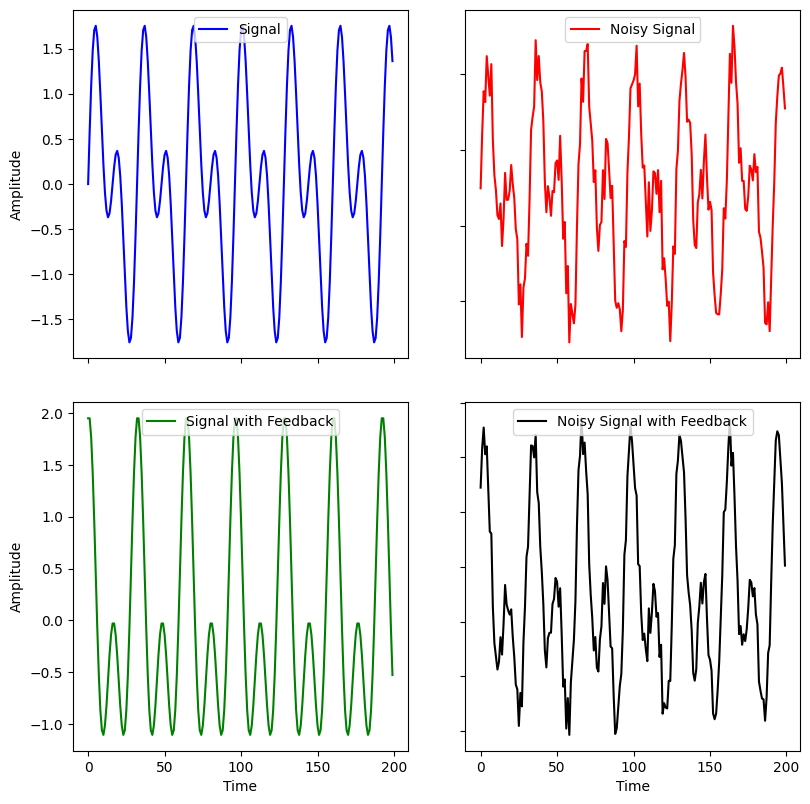

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

axs[0, 0].plot(taxis, sender_signal, '-b', label='Signal')
axs[0, 1].plot(taxis, receiver_signal2, '-r', label='Noisy Signal')
axs[1, 0].plot(taxis, receiver_signal3, '-g', label='Signal with Feedback')
axs[1, 1].plot(taxis, receiver_signal4, '-k', label='Noisy Signal with Feedback')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Amplitude')
    ax.label_outer()
    ax.legend(loc='upper center')





Part (2 of 3)
# $\color{green}{\text{Implementation of Adaline}}$
In this part we shall see how Adaline can be used as an adaptive filter to cancel out the noise in the incoming signal.

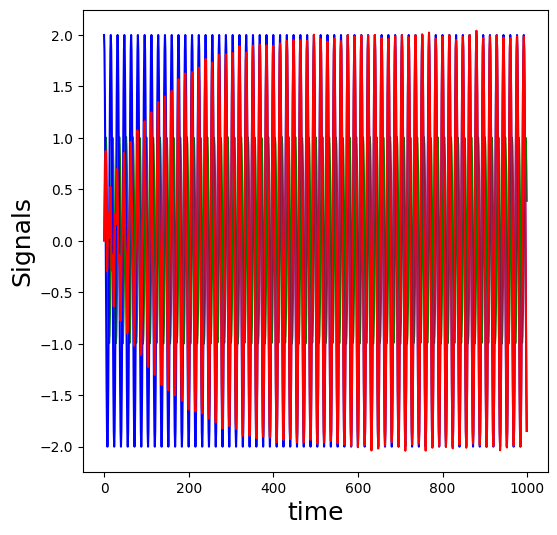

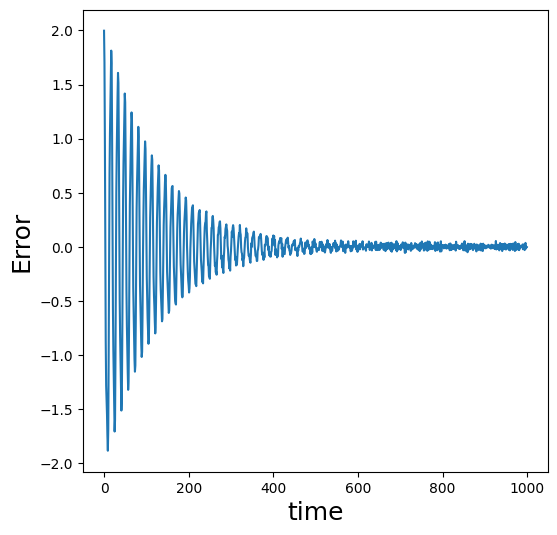

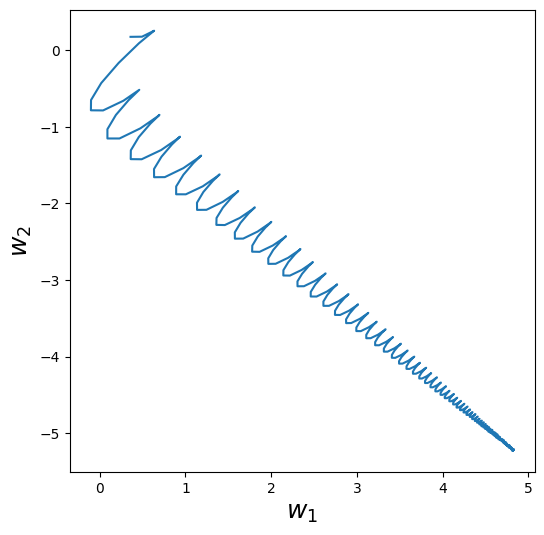

In [ ]:
# initialize weights
w = [random.random(), random.random()]

# initialize the inputs
x = [0.01 * random.random(), 0.01 * random.random()]

# print(x[0])
# print(x[1])

# initialize the learning rate
alpha = 0.2


N = 1000 # maximum number of iterations
timeAxis = []
inputSignal = []
targetSignal = []
outputSignal = []
errorVector = []
wlist1 = []
wlist2 = []

for k in range(N):
  x[0] = np.sin(np.pi*k/8) + 0.01*random.random()
  timeAxis.append(k)
  inputSignal.append(x[0])
  targetSignal.append(2.0*np.cos(np.pi*k/8))
  outputSignal.append(np.dot(x, w))
  errorVector.append(targetSignal[k] - outputSignal[k]) # claculate the error
  w[0] = w[0] + alpha * errorVector[k] * x[0]
  w[1] = w[1] + alpha * errorVector[k] * x[1]
  wlist1.append(w[0])
  wlist2.append(w[1])
  x[1] = x[0]

fig = plt.figure(figsize=(6,6))

plt.plot(timeAxis, inputSignal,'g-', timeAxis, targetSignal,'b-', timeAxis, outputSignal,'r-')
# plt.plot(timeAxis, targetSignal,'b-', timeAxis, outputSignal,'r-')
plt.xlabel('time', fontsize=18)
plt.ylabel('Signals', fontsize=18)
plt.show()

fig = plt.figure(figsize=(6,6))

plt.plot(errorVector)
plt.xlabel('time', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.show()

fig = plt.figure(figsize=(6,6))

plt.plot(wlist1, wlist2)
plt.xlabel('$w_1$', fontsize=18)
plt.ylabel('$w_2$', fontsize=18)
plt.show()

Part (3 of 3)
# $\color{green}{\text{Gradient Descent Visualization}}$
In this part we shall see how the Delta Rule uses Gradient Descent to converge to the solution (a.k.a. minimum value on the weight-space).

20 20


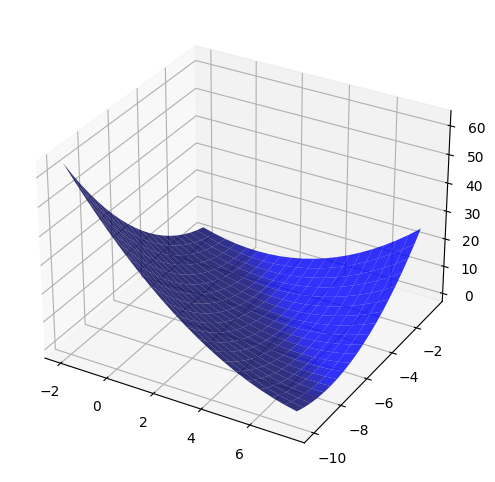

In [ ]:
xg = np.arange(-2,8,0.5)
yg = np.arange(-10,0,0.5)
# xg = np.arange(-5,12,0.5)
# yg = np.arange(-15,5,0.5)
nx = len(xg)
ny = len(yg)
print(nx, ny)
cpi8 = np.cos(np.pi/8)
spi8 = np.sin(np.pi/8)

X,Y = np.meshgrid(xg,yg)
# Z = X*np.exp(-X2 - Y2)
Z = 0.51*(X**2+Y**2) + cpi8*X*Y + 2*spi8*Y

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, Z, color='b', alpha=0.8)
# ax.view_init(10, 30) # change elevation and azimuthal angle of camera/view point
plt.show()

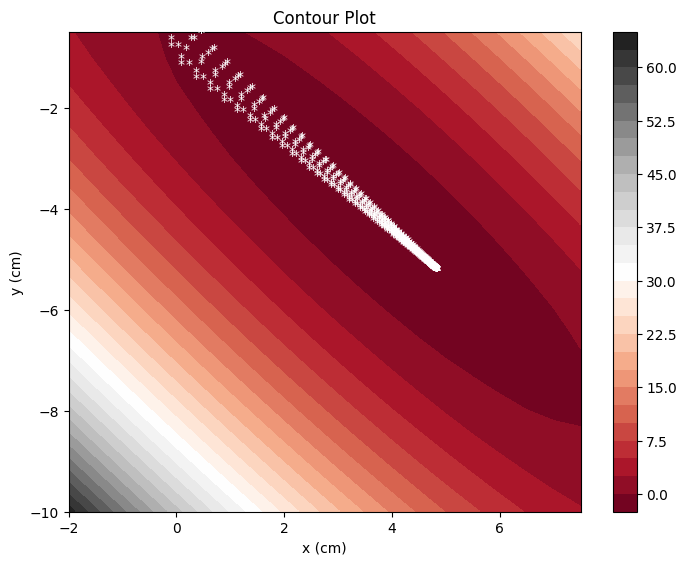

In [ ]:
fig = plt.figure(figsize=(8,6))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
# ax2 = fig.add_axes([-2, 8, 0, 10])

cp = plt.contourf(X, Y, Z, 30, cmap='RdGy')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')

# plt.annotate('hi', (5,5), xytext=all_ws[i, :],
#                  arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
#                  va='center', ha='center')
for i in range(len(wlist1)-1):
  ax.annotate('*', xy=(wlist1[i],wlist2[i]), xycoords='data', color='white',
                #  arrowprops={'arrowstyle': '->', 'color': 'w', 'lw': 1, 'ls':'-'},
                 va='center', ha='center')


plt.show()